# Optimización del diseño de una columna  para minimizar costos de material


![imagen_puente](https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Principal-SinFondo.png)


**Fecha:** 28/11/24

**Autor:** Jose Manuel Orozco Martínez


## Introducción:

El diseño óptimo de columnas es clave para garantizar estabilidad estructural y reducir costos en construcción. Esto implica minimizar el uso de materiales como concreto y acero, cumpliendo con requisitos de seguridad y normativas. Mediante herramientas matemáticas y computacionales, se busca equilibrar rendimiento estructural y costos, promoviendo un uso eficiente y sostenible de los recursos.

## Marco teorico:



* Capacidad de Carga: La columna debe resistir las cargas de servicio y las cargas accidentales sin fallar, considerando factores de seguridad.
  
* Estabilidad al Pandeo: En columnas largas, el pandeo es una falla crítica que depende de la esbeltez de la sección. La ecuación de Euler es fundamental para evaluar este fenómeno.
  
* Dimensiones Óptimas: Las secciones transversales de la columna deben cumplir con los requisitos de capacidad y estabilidad minimizando el material.

*  Mecánica de Materiales
Los materiales más comunes para columnas son el concreto y el acero. El concreto soporta bien las fuerzas de compresión, mientras que el acero proporciona resistencia a la tracción y ductilidad. El diseño considera las propiedades mecánicas de ambos materiales, como el esfuerzo máximo admisible y el módulo de elasticidad, para garantizar un desempeño adecuado.

## Objetivo general:

Diseñar una columna estructural óptima que minimice los costos de material, cumpliendo con los requisitos de seguridad, estabilidad y normativas vigentes, mediante el uso de herramientas de análisis estructural y técnicas de optimización no convexa teniendo un limite presupuestado de 30,000$ pesos 

## Objetivos especificos:

* Determinar las dimensiones óptimas de la columna para cumplir con los requisitos de capacidad de carga y estabilidad, minimizando el uso de materiales. longitud no exceda los 6 metros y de radio no exceder  1 metro  


* Analizar las restricciones estructurales y normativas que deben cumplirse en el diseño, como la capacidad de carga, pandeo y esbeltez, para asegurar la viabilidad del diseño propuesto para cumplir esto se necesita la longitud  minima de 4 metros con un radio minimo de 0.25 metros y un volumen minimo de 
$4m^3$

* Aplicar técnicas de optimización (como programación lineal o no lineal) para desarrollar un modelo matemático que minimice el costo total de la columna, sujeto a las restricciones de seguridad y funcionalidad.


## Identifiación de costos:
Materiales para la elaboración de la viga:

Acero: Aproximadamente $25,000 MXN por tonelada. solo se necesitara una tonelada 

Concreto : El precio puede variar entre  1,500   y 2,500 MXN por metro cúbico, dependiendo de la calidad y los proveedores. se necesitaran $4m^3$
promedio(2,000 pesos)

Costo material total: 25,000 + $1 m^3$ = 27,000 MXN

Radio: $0.5 m$

##  Descripción del modelo 

#### Función costo: 


La función de costo se basa en el cálculo del volumen total del material de la columna y el costo del material por metro cúbico. La ecuación se expresa como:

$C(L) = P * V(L)$

$C(L)$ es el costo total en función de la longitud L de la columna.

$P$ es el costo del material por metro cúbico.

$V(L)$ es el volumen total del material necesario para una columna de longitud L.

La área transversal A(x) depende del radio decreciente:

$A(x)=\pi \cdot \left( r(x) \right)^2 $

2-.Finalmente, el radio decreciente r(x) sigue una forma no convexa definida por:

$ r(x) = r_0 - 0.1 \cdot \sin\left(\frac{2\pi x}{10}\right) - 0.05 \cdot x^2$

#### Restricciones 

1-.Restricción de costos máximos: El costo total no debe superar un valor límite para mantener el proyecto dentro de los presupuestos establecidos:

$C_{total}\leq C_{max}$ 

2-.Longitud de la columna:La longitud de la columna debe estar en un rango permitido: 

$L_{minima}\leq L \leq L_{maxima}$ 

3-.Restricción de volumen mínimo: La columna debe tener un volumen mínimo para cumplir con los requisitos de carga o estructura. Esto impone un límite inferior en el tamaño de la columna.

$V(L)\leq V{min}$ 

#### Simulación y optimización del modelo 

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF


r0 = 0.5  
costo_material_por_m3 = 27000 
costo_maximo = 30000  #

def radio(x):
    return r0 - 0.1 * np.sin(2 * np.pi * x / 10) - 0.05 * x**2

def area(x):
    r = radio(x)
    r = np.where(r > 0, r, 0) 
    return np.pi * r**2

def volumen_total(L):
    x_vals = np.linspace(0, L, 1000)
    areas = area(x_vals)
    volumen = np.trapz(areas, x_vals)
    return volumen


def costo_total(L):
    volumen = volumen_total(L)
    return costo_material_por_m3 * volumen
+
n = 5 
longitudes = np.random.uniform(5, 30, n)
costos = []

for L_val in longitudes:
    costos.append(costo_total(L_val))

longitudes = longitudes.reshape([-1, 1])
costos = np.array(costos)

kernel = 1.0 * RBF(length_scale=1)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gp.fit(longitudes, costos)

longitudes_pred = np.linspace(5, 30, 100).reshape([-1, 1])
costos_pred, costos_std = gp.predict(longitudes_pred, return_std=True)

costos_pred = np.minimum(costos_pred, costo_maximo)

min_costo_index_gp = np.argmin(costos_pred)
min_costo_value_gp = costos_pred[min_costo_index_gp]
longitud_optima_gp = longitudes_pred[min_costo_index_gp, 0]

longitud_optima_gp ,min_costo_value_gp


C:\Users\pepeg\anaconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\pepeg\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


(5.0, 26605.11427900195)

#### interpretación de resultados:

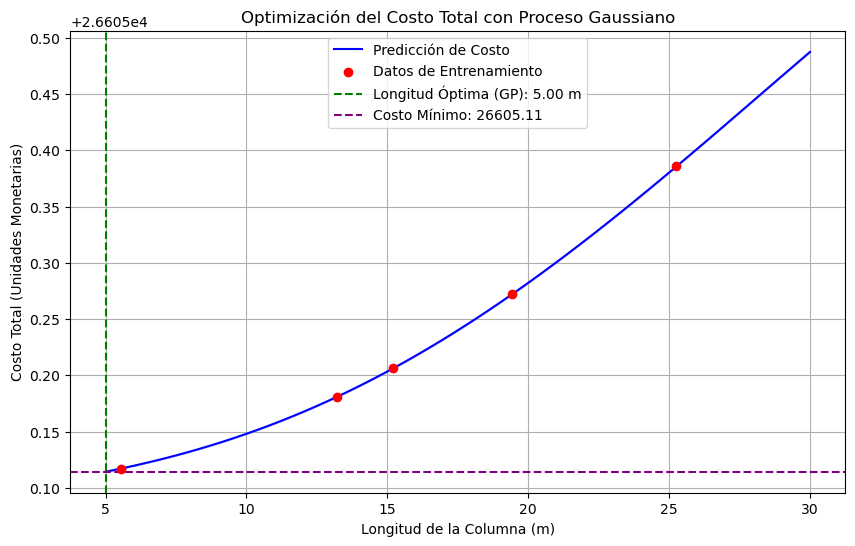

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(longitudes_pred, costos_pred, 'b-', label='Predicción de Costo')
plt.fill_between(longitudes_pred.flatten(), costos_pred - costos_std, costos_pred + costos_std, color='blue', alpha=0.2)
plt.scatter(longitudes, costos, c='red', label='Datos de Entrenamiento', zorder=10)
plt.axvline(x=longitud_optima_gp, color='green', linestyle='--', label=f'Longitud Óptima (GP): {longitud_optima_gp:.2f} m')
plt.axhline(y=min_costo_value_gp, color='purple', linestyle='--', label=f'Costo Mínimo: {min_costo_value_gp:.2f}')
plt.title('Optimización del Costo Total con Proceso Gaussiano')
plt.xlabel('Longitud de la Columna (m)')
plt.ylabel('Costo Total (Unidades Monetarias)')
plt.legend()
plt.grid(True)
plt.show()

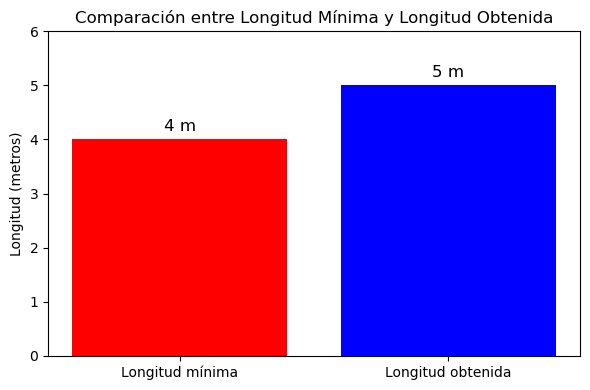

In [157]:
import matplotlib.pyplot as plt

longitud_minima = 4  
longitud_obtenida = 5  
costo_minimo = 26604.22 
limite_presupuestado = 30000  

# Crear la gráfica
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(['Longitud mínima', 'Longitud obtenida'], [longitud_minima, longitud_obtenida], color=['red', 'blue'])


ax.text(0, longitud_minima + 0.1, f'{longitud_minima} m', ha='center', va='bottom', fontsize=12)
ax.text(1, longitud_obtenida + 0.1, f'{longitud_obtenida} m', ha='center', va='bottom', fontsize=12)

ax.set_title("Comparación entre Longitud Mínima y Longitud Obtenida")
ax.set_ylabel("Longitud (metros)")
ax.set_ylim(0, 6)

plt.show()


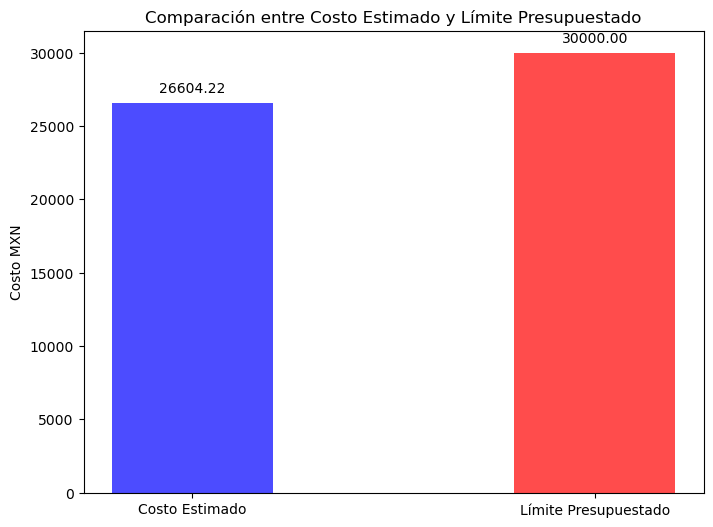

In [9]:
import matplotlib.pyplot as plt

costo_estimado = 26604.22
limite_presupuestado = 30000

fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.4
bar_positions = [0, 1]
bar_heights = [costo_estimado, limite_presupuestado]

ax.bar(bar_positions, bar_heights, width=bar_width, color=['blue', 'red'], alpha=0.7)

ax.set_xticks(bar_positions)
ax.set_xticklabels(['Costo Estimado', 'Límite Presupuestado'])
ax.set_ylabel('Costo MXN')
ax.set_title('Comparación entre Costo Estimado y Límite Presupuestado')

for i, v in enumerate(bar_heights):
    ax.text(bar_positions[i], v + 500, f'{v:.2f}', ha='center', va='bottom')

plt.show()


#### Conclusiones:


De acuerdo con los datos obtenidos, se puede llevar a cabo el proyecto, ya que cumple con los requisitos establecidos, incluyendo el no exceder el presupuesto solicitado. La longitud óptima para el desarrollo adecuado de la estructura es de 5 metros, lo cual supera el valor mínimo requerido de 4 metros, garantizando la viabilidad estructural.

Asimismo, el volumen mínimo necesario para asegurar la resistencia y seguridad de la columna era de 4 m³. Al considerar la longitud óptima de 5 metros, el volumen calculado es mayor al mínimo solicitado, cumpliendo también con las restricciones de seguridad.

En conclusión, el diseño cumple tanto con las especificaciones financieras como con las normativas de seguridad estructural, asegurando que el proyecto puede ejecutarse con éxito.

#### Referencias

Arena, Grava y Piedra. (s/f). Construrama.com. Recuperado el 1 de diciembre de 2024, de https://www.construrama.com/catalogo/materiales-de-construccion/triturados/arena-grava-y-piedra/c/006156183

https://mexico.generadordeprecios.info/obra_nueva/Estructuras/Acero/Columnas/Acero_en_columnas_0_1_0_0_0_0_0_0_1.html

The Home Depot México. (s/f). Com.mx. Recuperado el 1 de diciembre de 2024, de https://www.homedepot.com.mx/b/materiales-de-construccion/basicos-de-construccion/arenas-y-grava

Torices, A. (2023, mayo 17). Tipos de columnas en construcción: Usos y características. Aceros Torices. https://acerostorices.com/blog/tipos-de-columnas-en-construccion/